In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from pysgpp.extensions.datadriven.learner import LearnerBuilder
from pysgpp.extensions.datadriven.uq.plot.plot1d import plotSG1d
from pysgpp.extensions.datadriven.uq.plot.plot2d import plotSG2d

In [2]:
numSamples = 100
numDims = 1

def f(x):
    return np.prod(4. * x * (1 - x), axis=1)

print "generate uniformly distributed samples (%i, %i)" % (numSamples, numDims)
samples = np.random.rand(numSamples, numDims)
values = f(samples)

generate uniformly distributed samples (100, 1)


In [3]:
numDims = 1

df = pd.read_csv('CUTOFF_RADIUS_times.csv', header = None, names = ['radius', 'time'])
df = df[~df.time.isna()]

num_samples = df.shape[0]
samples = df.radius.values                           # change this to multiple dimensions 
                                                     # (i.e., a vector of paramter values)
values = df.time.values                              # this remains a single value (time)

In [4]:
samples = (samples - np.min(samples))/(np.max(samples) - np.min(samples))
values = (values - np.min(values))/(np.max(values) - np.min(values))

In [5]:
samples = samples.reshape(45,1)

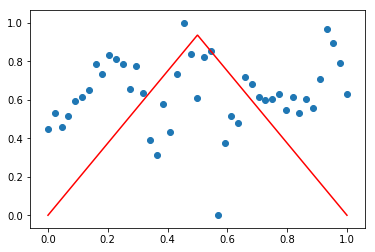

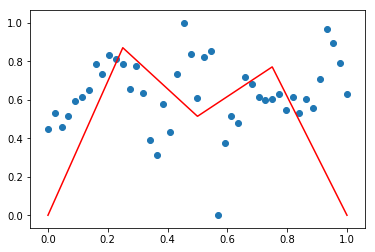

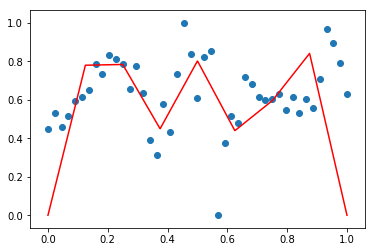

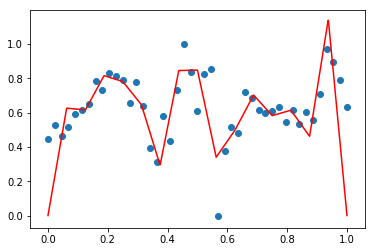

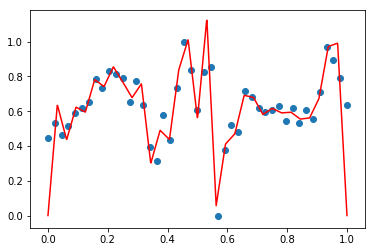

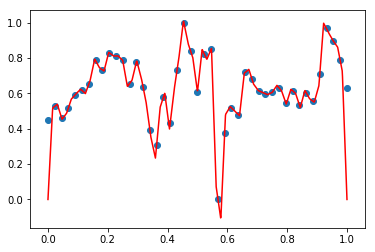

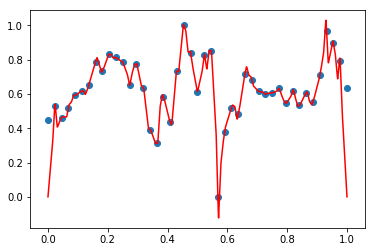

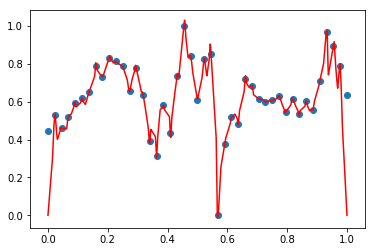

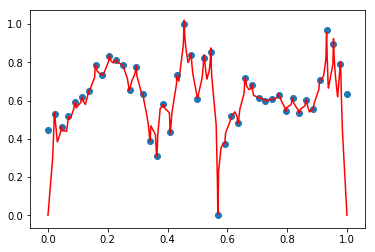

In [6]:
for levels in range(1, 10):
    builder = LearnerBuilder()
    builder.buildRegressor()
    builder.withTrainingDataFromNumPyArray(samples, values)
    builder = builder.withGrid()
    builder.withLevel(levels)
    builder = builder.withSpecification()
    builder.withLambda(0.0001)


    # does not seem to work!!
    # builder.withLaplaceOperator()


    builder.withIdentityOperator()
    builder = builder.withStopPolicy()
    builder = builder.withCGSolver()
    builder.withAccuracy(0.000100)
    builder.withImax(500)
    learner = builder.andGetResult()

    learner.learnData()
    if numDims == 1:
        plt.scatter(samples[:, 0], values)
        plotSG1d(learner.grid, learner.alpha, color="red")
    else:
        plotSG2d(learner.grid, learner.alpha)
        plt.scatter(samples[:, 0], samples[:, 1])
    plt.show()